In [1]:
import os
import pandas as pd
import numpy as np
import datetime

In [2]:
rebalData = pd.read_excel('rebalData_1906.xlsx') # 전체 리밸런싱 스케줄 불러오기
priceData = pd.read_excel('PE Ratio_190530.xlsx', sheet_name='P')  # 전체 가격 데이터 불러오기

def data_cleansing_quantiwise(rawData):
    '''Quantiwise 제공 시계열데이터 클렌징 용도
    - 열 : 종목명
    - 행 : 시계열
    '''    
    firmCode = rawData.iloc[6, 1:].values
    dateIndex = rawData.iloc[13:, 0].values
    newData = rawData.iloc[13:,1:]
    newData.columns = firmCode
    newData.index = dateIndex
    return newData

priceData = data_cleansing_quantiwise(priceData)

In [3]:
priceData.head()

,A000010,A000020,A000030,A000040,A000050,A000060,A000070,A000080,A000090,A000100,...,A300720,A306200,A307950,A316140,A900030,A900050,A900140,A950010,A950070,A950100
1999-01-29,5823,2640,8700,16333,1413,1076,13933,4500,NaN,14755,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-02-26,4570,2219,8200,12737,1298,1076,11557,3360,NaN,13625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-03-31,6140,2521,12000,12287,1406,1525,16526,3830,NaN,15608,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-04-30,7000,3116,10300,13186,1867,1819,21926,5700,NaN,16802,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-05-31,6260,3399,7750,14685,1961,1664,24410,4750,NaN,19147,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
rebalData.head()

,date,code,weight
0,2001-02-28,A000700,0.033333
1,2001-02-28,A001440,0.033333
2,2001-02-28,A025830,0.033333
3,2001-02-28,A011200,0.033333
4,2001-02-28,A003030,0.033333


In [5]:
rebal_schedule = list(set(rebalData.date))  # 리밸런싱 일자만 추출 (날짜 오름차순으로 정렬)
rebal_schedule.sort()

In [6]:
rebal_schedule

[Timestamp('2001-02-28 00:00:00'),
 Timestamp('2001-05-31 00:00:00'),
 Timestamp('2001-08-31 00:00:00'),
 Timestamp('2001-11-30 00:00:00'),
 Timestamp('2002-02-28 00:00:00'),
 Timestamp('2002-05-31 00:00:00'),
 Timestamp('2002-08-30 00:00:00'),
 Timestamp('2002-11-29 00:00:00'),
 Timestamp('2003-02-28 00:00:00'),
 Timestamp('2003-05-30 00:00:00'),
 Timestamp('2003-08-29 00:00:00'),
 Timestamp('2003-11-28 00:00:00'),
 Timestamp('2004-02-27 00:00:00'),
 Timestamp('2004-05-31 00:00:00'),
 Timestamp('2004-08-31 00:00:00'),
 Timestamp('2004-11-30 00:00:00'),
 Timestamp('2005-02-28 00:00:00'),
 Timestamp('2005-05-31 00:00:00'),
 Timestamp('2005-08-31 00:00:00'),
 Timestamp('2005-11-30 00:00:00'),
 Timestamp('2006-02-28 00:00:00'),
 Timestamp('2006-05-31 00:00:00'),
 Timestamp('2006-08-31 00:00:00'),
 Timestamp('2006-11-30 00:00:00'),
 Timestamp('2007-02-28 00:00:00'),
 Timestamp('2007-05-31 00:00:00'),
 Timestamp('2007-08-31 00:00:00'),
 Timestamp('2007-11-30 00:00:00'),
 Timestamp('2008-02-

In [7]:
# 주가 데이터에서 리밸련싱 날짜에 해당하는 값만 추출
rebal_price = priceData.loc[rebal_schedule,:]
rebal_price.head()

,A000010,A000020,A000030,A000040,A000050,A000060,A000070,A000080,A000090,A000100,...,A300720,A306200,A307950,A316140,A900030,A900050,A900140,A950010,A950070,A950100
2001-02-28,2545,1661,865,7792,1889,316,11557,3100,NaN,22286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-05-31,2685,1926,865,9141,1817,558,15553,4000,NaN,25596,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-08-31,2220,1500,865,9740,1593,413,14219,3600,NaN,34036,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-11-30,3330,1940,865,7792,1608,646,16533,3330,NaN,34146,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-02-28,5720,2040,865,4600,1860,1393,27445,3500,NaN,34856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
priceData.pct_change(3).head()

,A000010,A000020,A000030,A000040,A000050,A000060,A000070,A000080,A000090,A000100,...,A300720,A306200,A307950,A316140,A900030,A900050,A900140,A950010,A950070,A950100
1999-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-04-30,0.202129,0.180303,0.183908,-0.192677,0.321302,0.690520,0.573674,0.266667,NaN,0.138733,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-05-31,0.369803,0.531771,-0.054878,0.152940,0.510786,0.546468,1.112140,0.413690,NaN,0.405284,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# 수익률 데이터로 변환
rebal_return = rebal_price.pct_change()
rebal_return.head()

,A000010,A000020,A000030,A000040,A000050,A000060,A000070,A000080,A000090,A000100,...,A300720,A306200,A307950,A316140,A900030,A900050,A900140,A950010,A950070,A950100
2001-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-05-31,0.055010,0.159542,0.0,0.173126,-0.038115,0.765823,0.345764,0.290323,NaN,0.148524,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-08-31,-0.173184,-0.221184,0.0,0.065529,-0.123280,-0.259857,-0.085771,-0.100000,NaN,0.329739,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-11-30,0.500000,0.293333,0.0,-0.200000,0.009416,0.564165,0.162740,-0.075000,NaN,0.003232,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-02-28,0.717718,0.051546,0.0,-0.409651,0.156716,1.156347,0.660013,0.051051,NaN,0.020793,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
rebal_return.shift(-1) 

,A000010,A000020,A000030,A000040,A000050,A000060,A000070,A000080,A000090,A000100,...,A300720,A306200,A307950,A316140,A900030,A900050,A900140,A950010,A950070,A950100
2001-02-28,0.055010,0.159542,0.000000,0.173126,-0.038115,0.765823,0.345764,0.290323,NaN,0.148524,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-05-31,-0.173184,-0.221184,0.000000,0.065529,-0.123280,-0.259857,-0.085771,-0.100000,NaN,0.329739,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-08-31,0.500000,0.293333,0.000000,-0.200000,0.009416,0.564165,0.162740,-0.075000,NaN,0.003232,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-11-30,0.717718,0.051546,0.000000,-0.409651,0.156716,1.156347,0.660013,0.051051,NaN,0.020793,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-02-28,0.066434,-0.219608,0.000000,0.024565,0.052151,-0.150036,-0.255019,0.114286,NaN,-0.029866,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-05-31,-0.072131,-0.066583,0.000000,0.000000,-0.013286,-0.071791,0.105106,0.000000,NaN,-0.092296,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-08-30,-0.165194,-0.064603,0.000000,0.179504,0.009839,0.063694,0.056119,-0.169231,NaN,0.001890,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-11-29,-0.222222,-0.054676,0.000000,-0.159021,-0.058462,-0.175364,-0.221724,0.000000,NaN,-0.014991,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-02-28,0.050340,0.156773,0.000000,-0.628235,0.167756,0.127593,0.225555,0.000000,NaN,0.144003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-05-30,-0.002591,0.077632,0.000000,-0.392405,0.049440,0.160994,-0.089583,0.000000,NaN,0.159092,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
rebal_return = rebal_return.shift(-1)  # 5월말 기준 수익률은 2월말 기준 종목데이터와 매칭시켜야 하기 때문에 한줄씩 앞으로 당겨줌

In [14]:
rebal_return.head()

,A000010,A000020,A000030,A000040,A000050,A000060,A000070,A000080,A000090,A000100,...,A300720,A306200,A307950,A316140,A900030,A900050,A900140,A950010,A950070,A950100
2001-02-28,0.055010,0.159542,0.0,0.173126,-0.038115,0.765823,0.345764,0.290323,NaN,0.148524,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-05-31,-0.173184,-0.221184,0.0,0.065529,-0.123280,-0.259857,-0.085771,-0.100000,NaN,0.329739,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-08-31,0.500000,0.293333,0.0,-0.200000,0.009416,0.564165,0.162740,-0.075000,NaN,0.003232,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-11-30,0.717718,0.051546,0.0,-0.409651,0.156716,1.156347,0.660013,0.051051,NaN,0.020793,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-02-28,0.066434,-0.219608,0.0,0.024565,0.052151,-0.150036,-0.255019,0.114286,NaN,-0.029866,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
return_quarterly = []

for i in range(len(rebal_schedule)):
    
    rebal_date = rebal_schedule[i]  # 리밸런싱 일자 순차적으로 호출
    firms = rebalData[rebalData['date'] == rebal_date]['code'].values  # 해당 리밸런싱 일자에만 해당하는 종목코드 불러오기
    basket = rebal_return.loc[rebal_date, firms]  # 해당 리밸런싱 일자의 수익률 데이터중 뽑힌 종목코드 데이터만 불러오기
    basket_return = basket.mean()  # 수익률의 평균 계산 (equal-weighted)
    return_quarterly.append(basket_return) # 수익률 리스트에 append

In [16]:
return_quarterly[:10]

[0.18717243700399286,
 -0.10084219894275433,
 0.23240437432049488,
 0.4409530029759144,
 -0.07174698414614276,
 -0.015991177156476907,
 -0.016034105500320427,
 -0.16746224264934606,
 0.2535642995672598,
 0.26862292616507044]

In [17]:
# 리밸런싱 일자를 인덱스로 하는 데이터프레임으로 변환 
return_quarterly = pd.DataFrame(return_quarterly, index = rebal_schedule, columns=['return'])  

In [18]:
return_quarterly = return_quarterly.shift(1)  # 수익률의 실현은 그 다음 리밸런싱 일자이기 때문에 한칸씩 뒤로 미뤄줌

In [19]:
return_quarterly.head()

,return
2001-02-28,NaN
2001-05-31,0.187172
2001-08-31,-0.100842
2001-11-30,0.232404
2002-02-28,0.440953


In [20]:
cumreturn_quarterly = (return_quarterly.fillna(0) + 1).cumprod()  # 누적수익률 계산을 위해 1씩 더하고 누적해서 곱함
cumreturn_quarterly.head()

,return
2001-02-28,1.000000
2001-05-31,1.187172
2001-08-31,1.067455
2001-11-30,1.315537
2002-02-28,1.895626


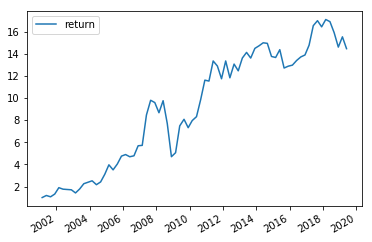

In [40]:
%matplotlib inline
cumreturn_quarterly.plot() # 차트 그리기

In [21]:
k200_p = pd.read_excel('PE Ratio_190530.xlsx', sheet_name='K200_price')
k200_p = data_cleansing_quantiwise(k200_p)

In [22]:
k200_p.head()

,IKS200,nan,nan
1999-01-29,65.72,NaN,NaN
1999-02-26,60.28,NaN,NaN
1999-03-31,71.84,NaN,NaN
1999-04-30,87.15,NaN,NaN
1999-05-31,85.68,NaN,NaN


In [23]:
k200_p = k200_p.iloc[:,0]

In [24]:
k200_p.head()

1999-01-29    65.72
1999-02-26    60.28
1999-03-31    71.84
1999-04-30    87.15
1999-05-31    85.68
Name: IKS200, dtype: object

In [25]:
k200_p = k200_p.loc[rebal_schedule,]

/Users/Woojin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


In [26]:
cumreturn_k200 = (k200_p.pct_change().fillna(0)+1).cumprod()

In [27]:
cumreturn_k200

2001-02-28    1.000000
2001-05-31    1.054755
2001-08-31    0.934572
2001-11-30    1.109371
2002-02-28    1.422512
2002-05-31    1.397283
2002-08-30    1.282922
2002-11-29    1.275991
2003-02-28    1.009842
2003-05-30    1.116302
2003-08-29    1.352786
2003-11-28    1.436235
2004-02-27    1.606876
2004-05-31    1.443582
2004-08-31    1.426255
2004-11-30    1.571943
2005-02-28    1.813834
2005-05-31    1.730524
2005-08-31    1.941918
2005-11-30    2.300388
2006-02-28    2.459800
2006-05-31    2.370530
2006-08-31    2.431938
2006-11-30    2.563904
2007-02-28    2.539507
2007-05-31    3.000416
2007-08-31    3.303022
2007-11-30    3.353341
2008-02-29    3.005961
2008-05-30    3.291655
                ...   
2012-02-29    3.702939
2012-05-31    3.383005
2012-08-31    3.473246
2012-11-30    3.524397
2013-02-28    3.715137
2013-05-31    3.624480
2013-08-30    3.489604
2013-11-29    3.736762
2014-02-28    3.582063
2014-05-30    3.603271
2014-08-29    3.679096
2014-11-28    3.516773
2015-02-27 

In [43]:
pd.concat([cumreturn_quarterly, cumreturn_k200], axis = 1)

,return,IKS200
2001-02-28,1.000000,1.000000
2001-05-31,1.187172,1.054755
2001-08-31,1.067455,0.934572
2001-11-30,1.315537,1.109371
2002-02-28,1.895626,1.422512
2002-05-31,1.759621,1.397283
2002-08-30,1.731483,1.282922
2002-11-29,1.703720,1.275991
2003-02-28,1.418411,1.009842
2003-05-30,1.778069,1.116302


In [28]:
results = pd.concat([cumreturn_quarterly, cumreturn_k200], axis = 1)

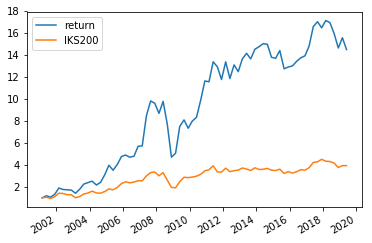

In [30]:
results.plot()